<a href="https://colab.research.google.com/github/endnef2/big_leader/blob/main/CV/Histogram_Equalization_D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. RGB Equalized Images

In [19]:
image_path = '/content/drive/MyDrive/Colab Notebooks/CV/image1.jpg'

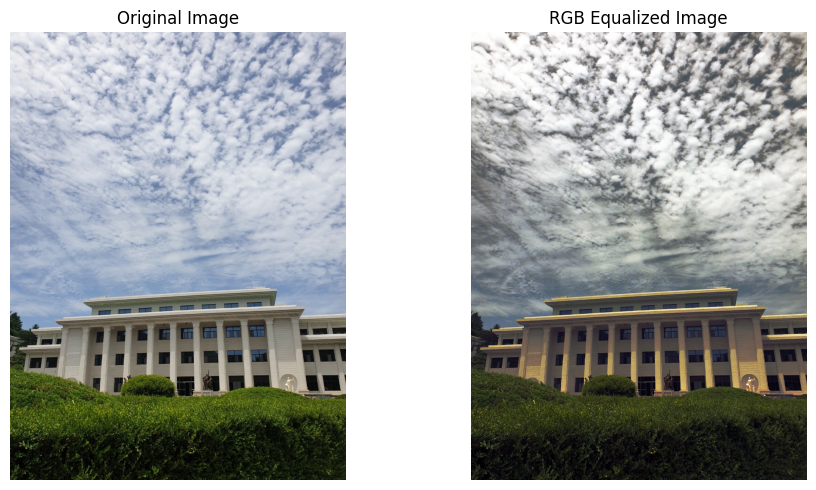

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기
image = cv2.imread(image_path)

# BGR 채널을 분리합니다.
b, g, r = cv2.split(image)

# 채널마다 히스토그램 평활화 적용
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)

# 평활화된 채널을 다시 병합합니다.
equalized_image = cv2.merge((equalized_b, equalized_g, equalized_r))

# 결과 이미지를 보여줍니다.
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('RGB Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

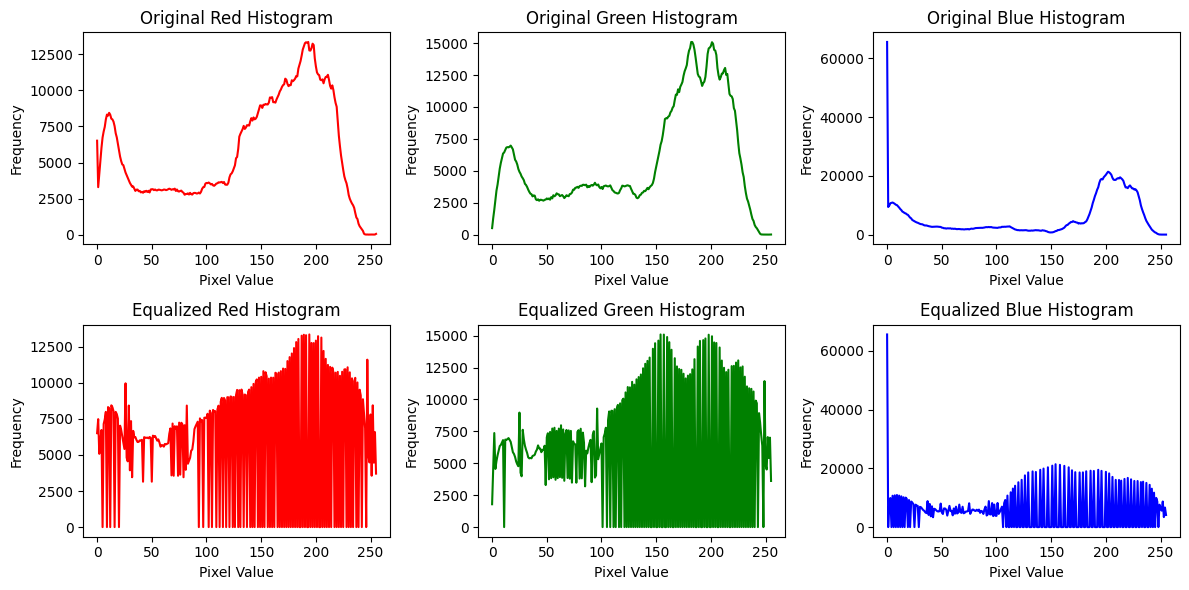

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 원본 이미지 불러오기
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# BGR 채널을 분리하고 히스토그램 평활화 적용
b, g, r = cv2.split(image)
equalized_b = cv2.equalizeHist(b)
equalized_g = cv2.equalizeHist(g)
equalized_r = cv2.equalizeHist(r)
equalized_image = cv2.merge((equalized_b, equalized_g, equalized_r))
equalized_image_rgb = cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB)

# 원본 이미지의 RGB 히스토그램 계산
hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

# 평활화된 이미지의 RGB 히스토그램 계산
hist_r_eq = cv2.calcHist([equalized_image_rgb], [0], None, [256], [0, 256])
hist_g_eq = cv2.calcHist([equalized_image_rgb], [1], None, [256], [0, 256])
hist_b_eq = cv2.calcHist([equalized_image_rgb], [2], None, [256], [0, 256])

# 히스토그램 그래프 출력
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.plot(hist_r, color='red')
plt.title('Original Red Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.plot(hist_g, color='green')
plt.title('Original Green Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.plot(hist_b, color='blue')
plt.title('Original Blue Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.plot(hist_r_eq, color='red')
plt.title('Equalized Red Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.plot(hist_g_eq, color='green')
plt.title('Equalized Green Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
plt.plot(hist_b_eq, color='blue')
plt.title('Equalized Blue Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. HSV space equalization

In [23]:
# 이미지 경로 지정 (여기에 적절한 이미지 경로를 입력해주세요)
image_path = '/content/drive/MyDrive/Colab Notebooks/CV/image1.jpg'

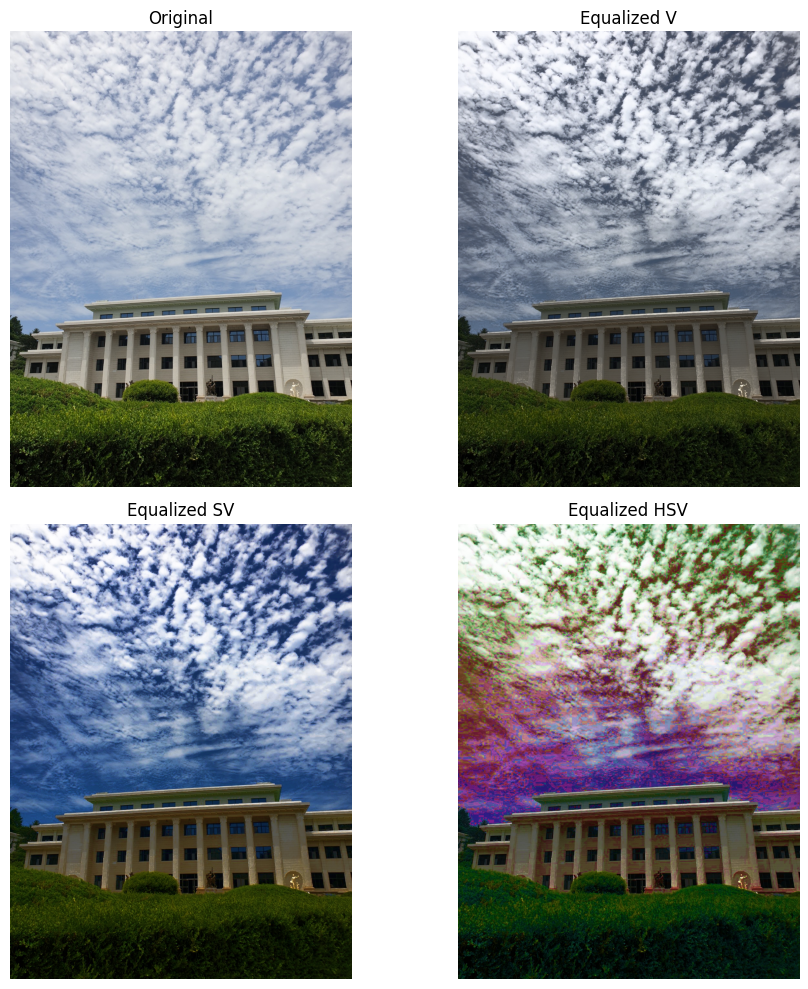

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 원본 이미지 불러오기
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지를 HSV로 변환
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# V 평활화
h, s, v = cv2.split(hsv)
v_eq = cv2.equalizeHist(v)
hsv_v_eq = cv2.merge([h, s, v_eq])
image_v_eq = cv2.cvtColor(hsv_v_eq, cv2.COLOR_HSV2RGB)

# SV 평활화
s_eq = cv2.equalizeHist(s)
hsv_sv_eq = cv2.merge([h, s_eq, v_eq])
image_sv_eq = cv2.cvtColor(hsv_sv_eq, cv2.COLOR_HSV2RGB)

# HSV 평활화
h_eq = cv2.equalizeHist(h)
hsv_hsv_eq = cv2.merge([h_eq, s_eq, v_eq])
image_hsv_eq = cv2.cvtColor(hsv_hsv_eq, cv2.COLOR_HSV2RGB)

# 이미지 표시
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(image_v_eq)
plt.title('Equalized V')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image_sv_eq)
plt.title('Equalized SV')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_hsv_eq)
plt.title('Equalized HSV')
plt.axis('off')

plt.tight_layout()
plt.show()

# 3. Reverse lighting compensation

In [25]:
# 이미지 경로 지정 (여기에 적절한 이미지 경로를 입력해주세요)
image_path = '/content/drive/MyDrive/Colab Notebooks/CV/image2.jpg'

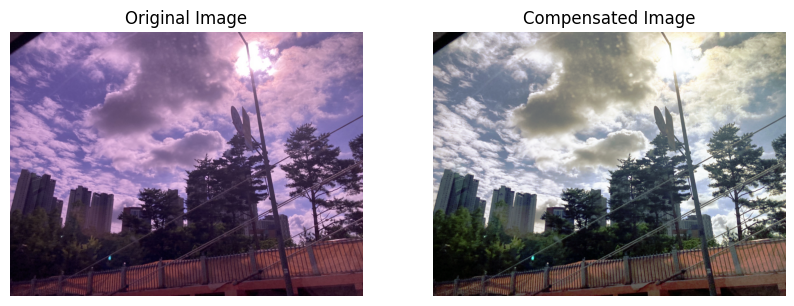

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 불러오기
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 각 채널에 대해 히스토그램 평활화 적용
r, g, b = cv2.split(image_rgb)
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# 평활화된 채널을 다시 합치기
image_eq = cv2.merge([r_eq, g_eq, b_eq])

# 원본 이미지와 보정된 이미지 표시
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_eq)
plt.title('Compensated Image')
plt.axis('off')

plt.show()

#3-1. grayscale

In [29]:
# 이미지 경로 지정 (여기에 적절한 이미지 경로를 입력해주세요)
image_path = '/content/drive/MyDrive/Colab Notebooks/CV/image3.jpg'

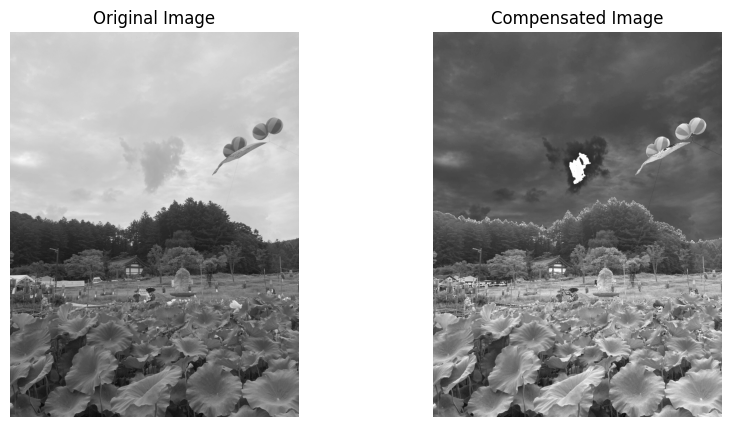

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# 이미지 불러오기
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 히스토그램 분석
hist = cv2.calcHist([image], [0], None, [256], [0,256])
a, b = np.where(hist == np.max(hist))[0][0] - 30, np.where(hist == np.max(hist))[0][0] + 30

# 파라미터 조정
best_result = None
best_score = float('inf')
for alpha in np.arange(0.5, 1.5, 0.1):
    for beta in np.arange(20, 40, 5):
        for gamma in np.arange(0.8, 1.2, 0.1):
            # Stretching 적용
            result = np.zeros_like(image, dtype=np.float32)
            result[image < a] = alpha * image[image < a]
            result[(image >= a) & (image <= b)] = beta + gamma * (image[(image >= a) & (image <= b)] - a)
            result[image > b] = alpha * (image[image > b] - b) + beta + gamma * (b - a)
            result = np.clip(result, 0, 255).astype(np.uint8)

            # 성능 평가 (예: MSE)
            score = np.mean((result - image) ** 2)
            if score < best_score:
                best_score = score
                best_result = result

# 최적 결과 표시
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(best_result, cmap='gray')
plt.title('Compensated Image')
plt.axis('off')

plt.show()

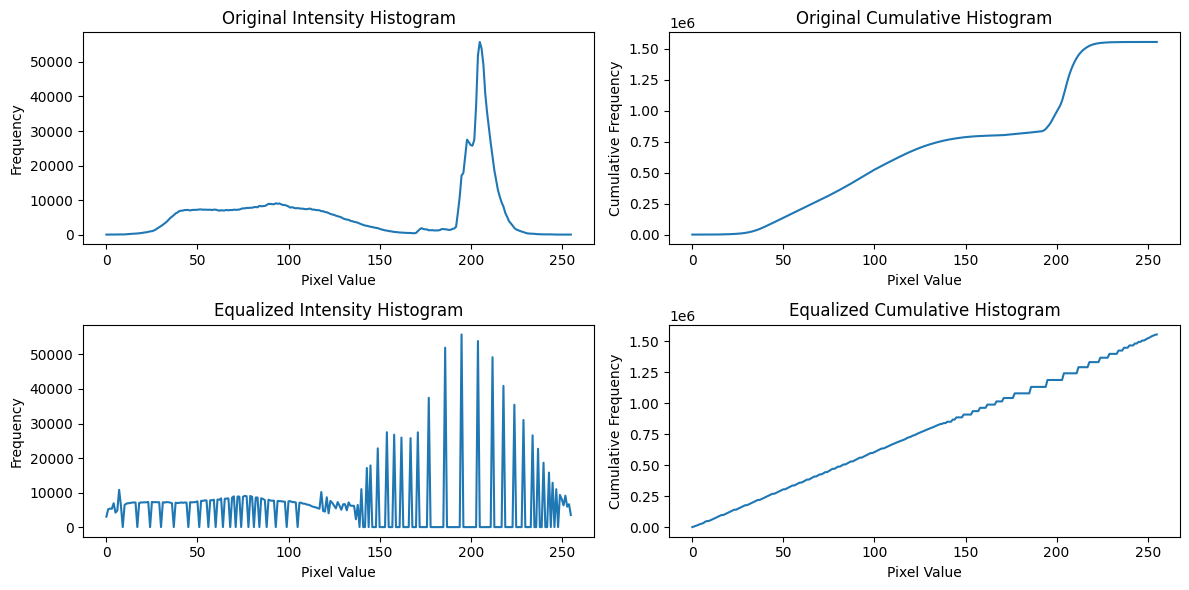

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 불러오기
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Histogram Equalization 적용
image_eq = cv2.equalizeHist(image)

# 원본 이미지의 intensity histogram과 cumulative histogram 계산
hist_original = cv2.calcHist([image], [0], None, [256], [0,256])
cumulative_original = hist_original.cumsum()

# 변환된 이미지의 intensity histogram과 cumulative histogram 계산
hist_equalized = cv2.calcHist([image_eq], [0], None, [256], [0,256])
cumulative_equalized = hist_equalized.cumsum()

# 그래프 표시
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(hist_original)
plt.title('Original Intensity Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.plot(cumulative_original)
plt.title('Original Cumulative Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')

plt.subplot(2, 2, 3)
plt.plot(hist_equalized)
plt.title('Equalized Intensity Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.plot(cumulative_equalized)
plt.title('Equalized Cumulative Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')

plt.tight_layout()
plt.show()
